In [29]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 300

import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MaxNLocator)
import numpy as np

from ambiance import Atmosphere
from pyfme.models.constants import ft2m
from pyfme.utils.anemometry import tas2cas


def tas_to_cas(tas, palt):
    # The POH says that the "Flight Test Data is corrected to I.C.A.O.
    # standard day conditions [...]." So, we're using Ambiance, which
    # implements the ICAO Standard Atmosphere as standardized in 1993.
    # When compared to the results of the 1976 atmospheric model from
    # PyFME, I don't see any visual difference.
    atmosphere = Atmosphere(palt * ft2m)
    p = atmosphere.pressure
    rho = atmosphere.density
    return tas2cas(tas, p, rho)

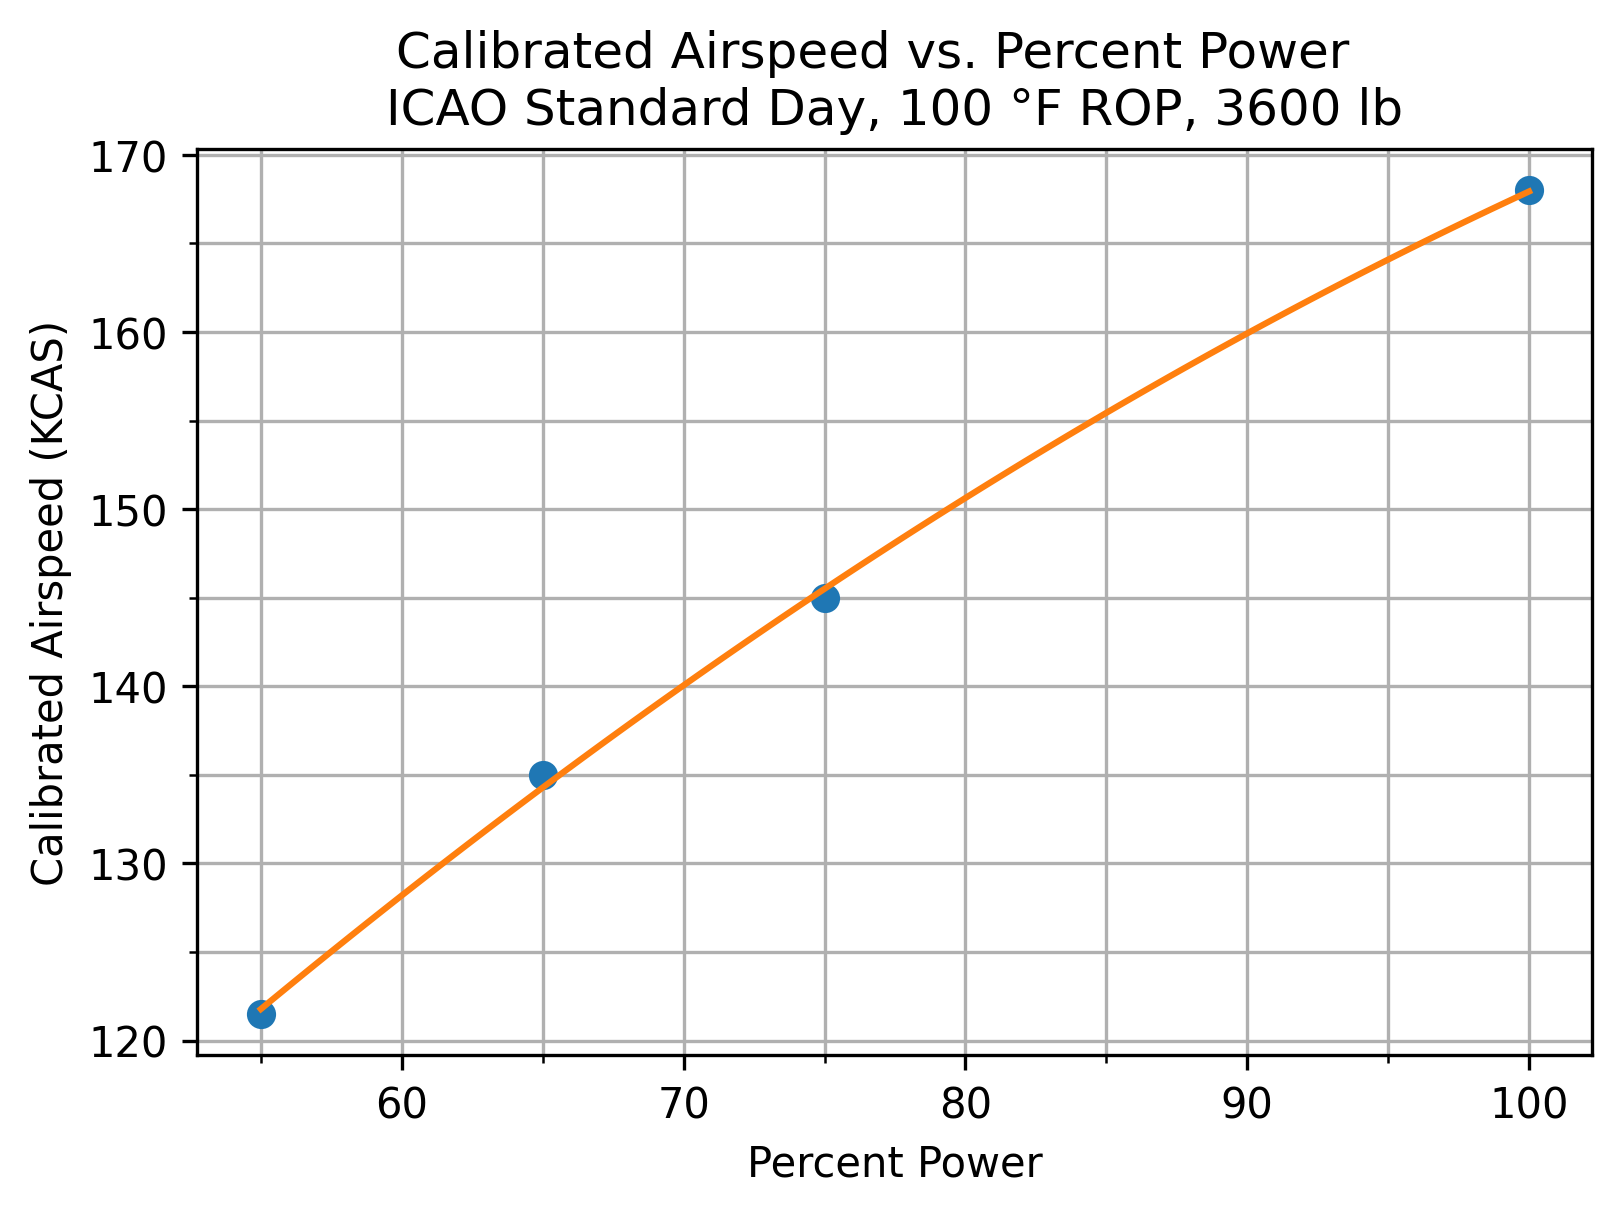

In [30]:
fig, ax = plt.subplots()
plt.suptitle("Calibrated Airspeed vs. Percent Power")

cas_vs_percent_power = {
    55: tas_to_cas(121.5, 0),
    65: tas_to_cas(135, 0),
    75: tas_to_cas(145, 0),
    100: tas_to_cas(168, 0)
}
x, y = zip(*cas_vs_percent_power.items())

# Fit a polynomial of the 2nd degree, using NumPy.
x, y = np.array(x), np.array(y)
f = np.poly1d(np.polyfit(x, y, 2))

# numpy.linspace returns evenly spaced numbers over a specified
# interval. We plug these new X values into the polynomial to get our
# new Y values. Set the first parameter of numpy.linspace to 0 to
# predict the curve below 55% power.
x_curve = np.linspace(x[0], x[-1], 100)
y_curve = f(x_curve)

ax.plot(x, y, "o", x_curve, y_curve)

ax.set(
    xlabel="Percent Power",
    ylabel="Calibrated Airspeed (KCAS)",
    title="ICAO Standard Day, 100 °F ROP, 3600 lb",
)

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.grid(True, which='both')

# Uncomment these lines to change the canvas of the graph. Useful to
# predict the curve below 55% power.
# ax.set_xlim([0, 100])
# ax.set_ylim([0, 170])

plt.show()


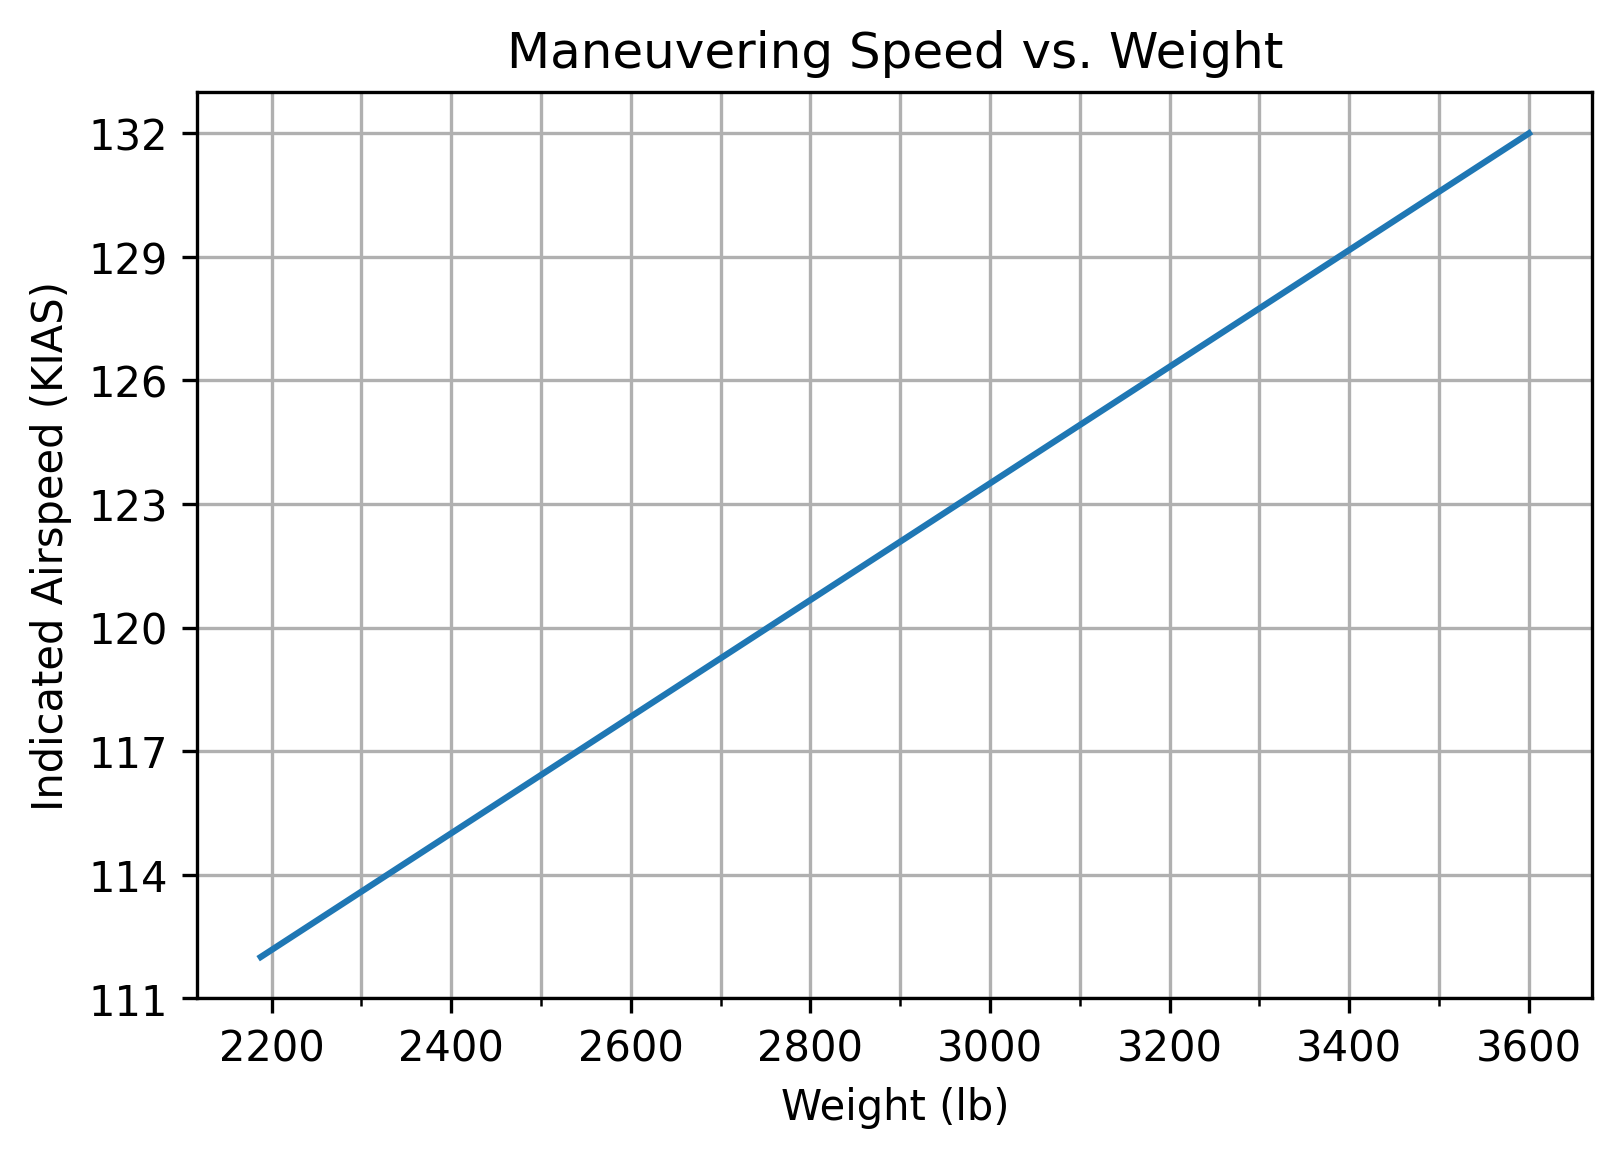

In [31]:
fig, ax = plt.subplots()

maneuvering_speed_vs_weight = {
    3600: 132,
    2188: 112
}
x, y = zip(*maneuvering_speed_vs_weight.items())
ax.plot(x, y)

# Fit a polynomial of the 1nd degree, using NumPy.
# x, y = np.array(x), np.array(y)
# f = np.poly1d(np.polyfit(x, y, 1))
# ax.annotate("f(x) = {}".format(f), (3000, 120))

ax.set(
    xlabel="Weight (lb)",
    ylabel="Maneuvering Speed (KIAS)",
    title="Maneuvering Speed vs. Weight"
)

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True, which='both')

plt.show()


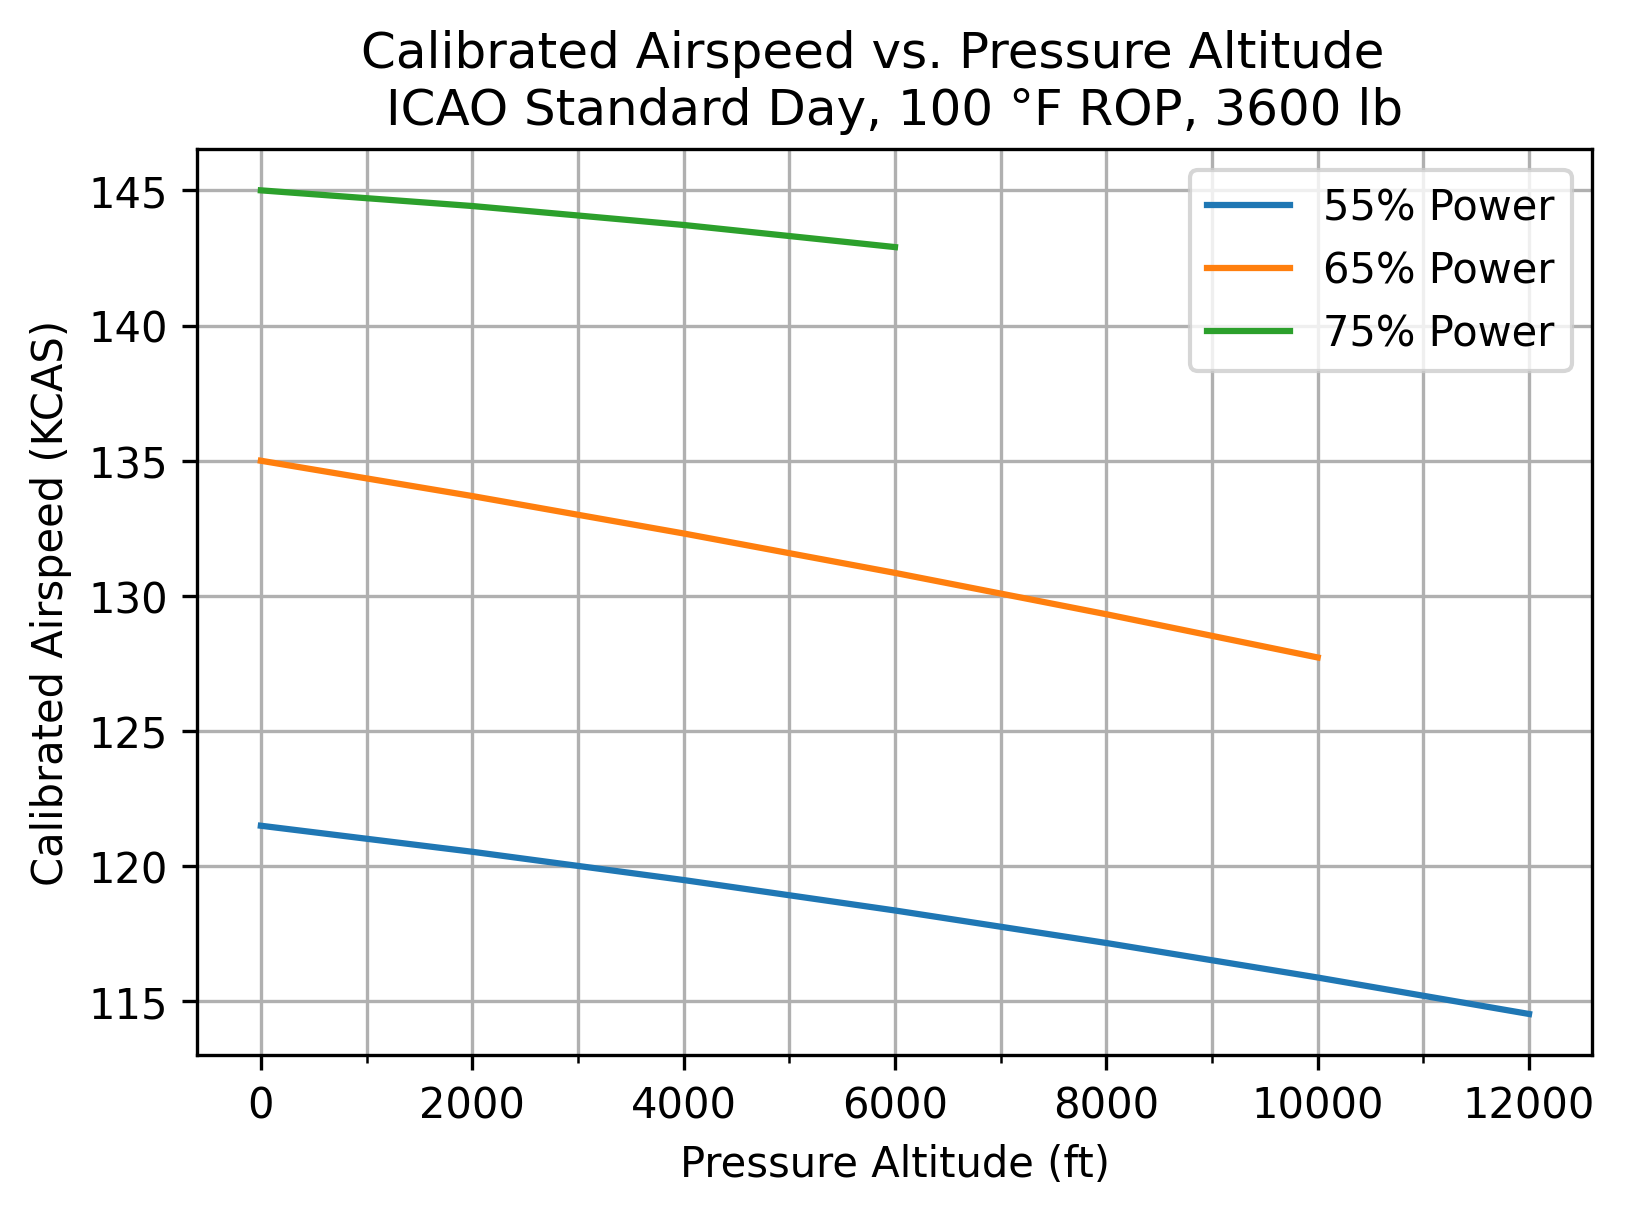

In [32]:
fig, ax = plt.subplots()
plt.suptitle("Calibrated Airspeed vs. Pressure Altitude")

# carsons_speed = 92 * 1.316
# plt.axhline(carsons_speed, color="r")
# plt.annotate("Carson's Speed ({:.0f} KIAS)".format(carsons_speed), (7250, carsons_speed + .5))

# TAS vs. Pressure Altitude at 55% Power.
tas_vs_palt_55 = {
    0: 121.5,
    2000: 124,
    4000: 126.5,
    6000: 129,
    8000: 131.5,
    10000: 134,
    12000: 136.5,
}
# Convert all TAS values to CAS using a standard atmospheric model.
tas_vs_palt_55 = {k: tas_to_cas(v, k) for k, v in tas_vs_palt_55.items()}
x, y = zip(*tas_vs_palt_55.items())
ax.plot(x, y, label="55% Power")

# TAS vs. Pressure Altitude at 65% Power.
tas_vs_palt_65 = {0: 135, 2000: 137.5, 4000: 140, 6000: 142.5, 8000: 145, 10000: 147.5}
tas_vs_palt_65 = {k: tas_to_cas(v, k) for k, v in tas_vs_palt_65.items()}
x, y = zip(*tas_vs_palt_65.items())
ax.plot(x, y, label="65% Power")

# TAS vs. Pressure Altitude at 75% Power.
tas_vs_palt_75 = {0: 145, 2000: 148.5, 4000: 152, 6000: 155.5}
tas_vs_palt_75 = {k: tas_to_cas(v, k) for k, v in tas_vs_palt_75.items()}
x, y = zip(*tas_vs_palt_75.items())
ax.plot(x, y, label="75% Power")

plt.legend()

ax.set(
    xlabel="Pressure Altitude (ft)",
    ylabel="Calibrated Airspeed (KCAS)",
    # These conditions were held constant for this analysis.
    title="ICAO Standard Day, 100 °F ROP, 3600 lb",
)

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.grid(True, which='both')

plt.show()
